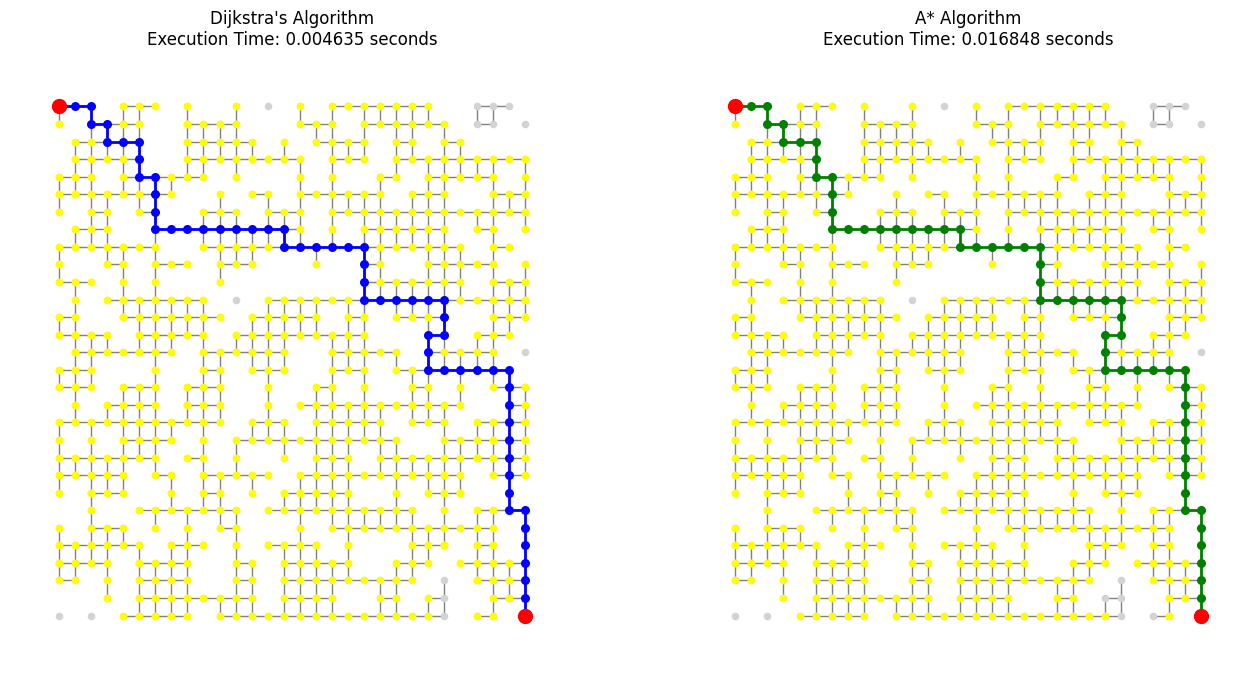

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq
import time

def dijkstra(graph, start, goal):
    start_time = time.time()

    queue = [(0, start)]
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    came_from = {start: None}
    visited = []

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        visited.append(current_node)

        if current_node == goal:
            break

        for neighbor in graph.neighbors(current_node):
            weight = graph.edges[current_node, neighbor]['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
                came_from[neighbor] = current_node

    path = []
    while goal:
        path.append(goal)
        goal = came_from[goal]
    path.reverse()

    end_time = time.time()
    execution_time = end_time - start_time

    return path, visited, execution_time

def a_star(graph, start, goal):
    start_time = time.time()

    def heuristic(a, b):
        return np.linalg.norm(np.array(a) - np.array(b))

    open_set = [(0, start)]
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal)
    came_from = {start: None}
    visited = []

    while open_set:
        _, current = heapq.heappop(open_set)
        visited.append(current)

        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph.edges[current, neighbor]['weight']

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    path = []
    while goal:
        path.append(goal)
        goal = came_from[goal]
    path.reverse()

    end_time = time.time()
    execution_time = end_time - start_time

    return path, visited, execution_time

def create_complex_grid_graph(size, weight_range=(1, 10), obstacle_density=0.3):
    G = nx.grid_2d_graph(size, size)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.randint(*weight_range)

    # Adding complex obstacles
    obstacles = set()
    for _ in range(int(size * size * obstacle_density)):
        x, y = np.random.randint(0, size, size=2)
        if (x, y) not in [(0, 0), (size-1, size-1)]:
            obstacles.add((x, y))

    for obstacle in obstacles:
        if obstacle in G:
            G.remove_node(obstacle)

    return G

def is_path_possible(graph, start, goal):
    try:
        nx.shortest_path(graph, source=start, target=goal)
        return True
    except nx.NetworkXNoPath:
        return False

def plot_graph(graph, path_dijkstra, path_astar, visited_dijkstra, visited_astar, start, goal, time_dijkstra, time_astar):
    pos = {(x, y): (y, -x) for x, y in graph.nodes()}

    plt.figure(figsize=(16, 8))

    plt.subplot(121)
    nx.draw(graph, pos, with_labels=False, node_size=20, node_color='lightgray', edge_color='gray')
    nx.draw_networkx_nodes(graph, pos, nodelist=visited_dijkstra, node_color='yellow', node_size=20)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(path_dijkstra, path_dijkstra[1:])), edge_color='blue', width=2)
    nx.draw_networkx_nodes(graph, pos, nodelist=path_dijkstra, node_color='blue', node_size=30)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start, goal], node_color='red', node_size=100)
    plt.title(f"Dijkstra's Algorithm\nExecution Time: {time_dijkstra:.6f} seconds")

    plt.subplot(122)
    nx.draw(graph, pos, with_labels=False, node_size=20, node_color='lightgray', edge_color='gray')
    nx.draw_networkx_nodes(graph, pos, nodelist=visited_astar, node_color='yellow', node_size=20)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(path_astar, path_astar[1:])), edge_color='green', width=2)
    nx.draw_networkx_nodes(graph, pos, nodelist=path_astar, node_color='green', node_size=30)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start, goal], node_color='red', node_size=100)
    plt.title(f"A* Algorithm\nExecution Time: {time_astar:.6f} seconds")

    plt.show()

size = 30  # Increased size for more complexity
start = (0, 0)
goal = (size-1, size-1)

# Ensure a valid graph with a path from start to goal
while True:
    graph = create_complex_grid_graph(size)
    if is_path_possible(graph, start, goal):
        break

path_dijkstra, visited_dijkstra, time_dijkstra = dijkstra(graph, start, goal)
path_astar, visited_astar, time_astar = a_star(graph, start, goal)

plot_graph(graph, path_dijkstra, path_astar, visited_dijkstra, visited_astar, start, goal, time_dijkstra, time_astar)